## Projet probabilités Pierre Chapel et Elliot Thuillier

On réutilise l'intégralité du code du projet de l'an dernier :

In [1]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special
import math
#Discrétisation
A=0
B=500
N=101
#Nombre de points de discrétisation
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization=discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a=50
sigma2=12
#Données 
depth=np.array([0,-4,-12.8,-1,-6.5,0])
observation_indexes=[0,20,40,60,80,100]

#Indices des composantes correspondant aux observations et aux componsantes non␣observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [2]:
#Fonction C
def Covexp(dist,rangeval,sigmaval):
    return sigmaval*np.exp(-dist/rangeval)

In [3]:
distmat=abs(np.subtract.outer(discretization,discretization))

In [4]:
Sigma=Covexp(distmat,a,sigma2)

In [5]:
SigmaObs=Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown=Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown=Sigma[unknown_indexes,:][:,unknown_indexes]

In [6]:
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

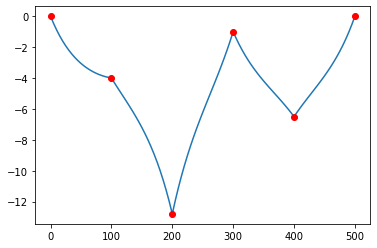

In [7]:
allval1=np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [8]:
SigmaCond=SigmaUnknown-np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

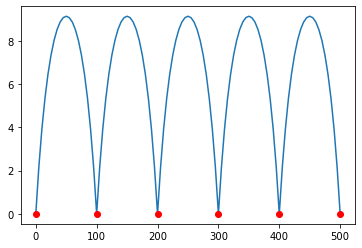

In [9]:
allval2=np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]),'ro')
plt.show()

In [10]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu=Ec+np.matmul(Cholesky,x)

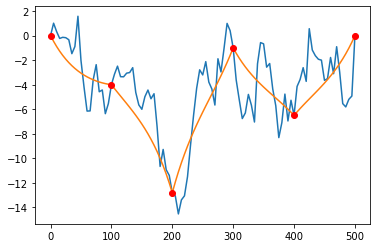

In [11]:
allval3=np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [12]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

In [13]:
K=10000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

In [14]:
sum(result)/K

522.4236031947877

In [15]:
length(allval1,Delta)

501.6468416918411

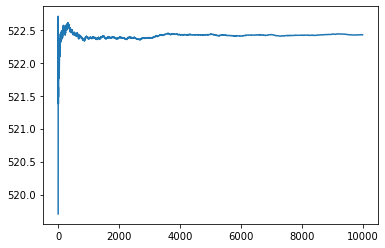

In [16]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

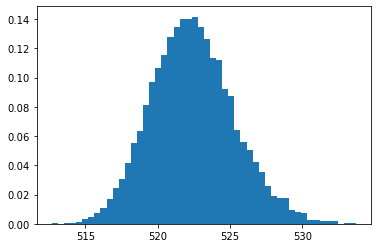

In [17]:
plt.hist(result,50,density=True)
plt.show()

In [18]:
np.quantile(result,[0.025,0.975])

array([517.13521985, 528.50550203])

In [19]:
np.mean(result>525)

0.1784

# Projet 2021 (Partie 2) :

## Valeurs positives

#### Question 1 : 
A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

On se propose alors d'implémenter une méthode de rejet sur les profondeurs simulées: Si une des profondeurs simulées est positive, on la simule à nouveau jusqu'à ce qu'elle soit négative :

In [20]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_r=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_r > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)

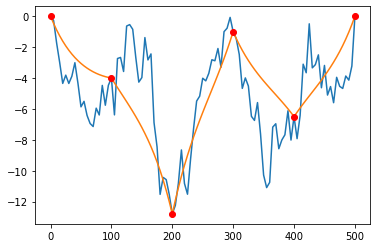

In [21]:
allval3_r=np.zeros(N)
allval3_r[unknown_indexes]=simu_r
allval3_r[observation_indexes]=depth
plt.plot(discretization,allval3_r)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

#### Question 2 

L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

On veut estimer une moyenne du taux de rejet :

In [22]:
nombre_de_tests = 0
compteur = 1000
for indice in range(compteur):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        nombre_de_tests +=1
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
print(f"Le taux de rejet est de {1- compteur/nombre_de_tests : .2f}")
    
    

Le taux de rejet est de  0.96


Comparons les longueurs moyennes de câble nécessaire avec ou sans rejet :
    

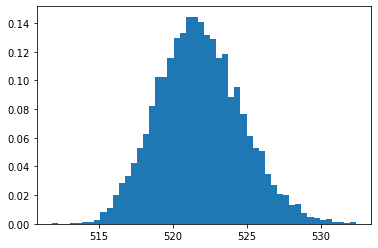

La nouvelle longueur moyenne de câble nécessaire est 521.82
Le nouvel intervalle de confiance est [516.61488448 527.71108237]
La nouvelle probabilité de dépasser une longueur moyenne de 525m est 0.13


In [23]:
#Avec rejet
K=10000
result_r = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec + np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
    allval3_r[unknown_indexes]=simu_r
    result_r[i]=length(allval3_r,Delta)

plt.hist(result_r,50,density=True)
plt.show()
print(f"La nouvelle longueur moyenne de câble nécessaire est {sum(result_r)/K:.2f}")
print(f"Le nouvel intervalle de confiance est {np.quantile(result_r,[0.025,0.975])}")
print(f"La nouvelle probabilité de dépasser une longueur moyenne de 525m est {np.mean(result_r>525):.2}")

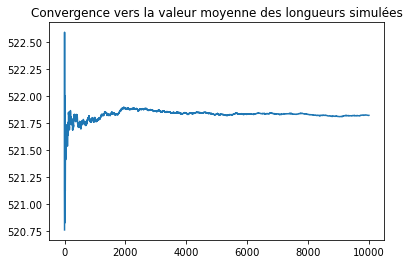

In [24]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_r)/indice_simu)
plt.title("Convergence vers la valeur moyenne des longueurs simulées")
plt.show()

Alors que l'ancienne longueur moyenne était 522.43
et l'ancien intervalle de confiance était [517.11451519 528.41473957]
et la proba de dépassement : 0.18303


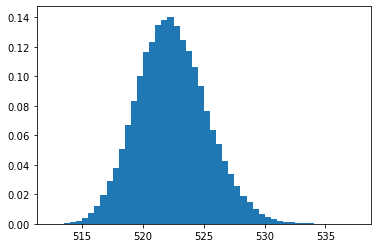

In [25]:
#Sans rejet
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
print(f"Alors que l'ancienne longueur moyenne était {sum(result)/K:.2f}")
print(f"et l'ancien intervalle de confiance était {np.quantile(result,[0.025,0.975])}")
print(f"et la proba de dépassement : {np.mean(result>525)}")

plt.hist(result,50,density=True)
plt.show()


On constate que la longueur moyenne de câble utilisée a diminué. C'est tout à fait cohérent, car la méthode de rejet a permis d'éliminer des points absurdes situés au dessus de la surface ce qui allongeait de fait la longueur moyenne de câble à utiliser.
La probabilité de dépasser les 525m de câble est donc moindre.
Toutefois, l'intervalle de confiance n'est pas restreint, il est simplement centré sur la nouvelle valeur moyenne, ce qui s'observe bien sur les historigrammes.



## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

#### Question 3:

 Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

#### Réponse :

$f_{µ|Z_{obs}=z}(x) = \frac{f_{Z_{obs}|µ = x}(z) . f_µ(x)}{f_{Z_{obs}}(z)}$ donc 
$$
f_{µ|Z_{obs}=z}(x) \propto f_{Z_{obs}|µ = x}(z) . f_µ(x)
$$
à $z$ fixé. Comme cette fonction est d'intégrale 1 par rapport à $x$, il suffit de trouver une fonction qui soit proportionnelle à la même quantité à $z$ fixé et qui soit d'intégrale 1 pour en déduire l'égalité entre cette fonction et $f$.  
Evaluons pour celà 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x))
$$
sachant qu'on pourra donc ne pas tenir compte des termes additifs ne dépendants que de $z$.  
On rappelle que
$$
f_{Z_{obs}|µ = x}(z) = \frac{1}{(2\pi)^{n/2}\sqrt{det(C_{obs})}}exp(-\frac{1}{2}(z-x)^tC_{obs}^{-1}(z-x))
$$
et que 
$$
f_µ(x)=\frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(x+5)^2}{8})
$$
Ainsi, on a 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x)) = (z-x)^tC_{obs}^{-1}(z-x) +\frac{(x+5)^2}{4}
$$
En mettant cette expression sous forme canonique, puis en ne considérant plus le terme constant, on reconnait la densité d'un vecteur aléatoire gaussien. Le coefficient devant $x^2$ est alors identifiable à $\frac{1}{\hat \sigma^2}$ et le coefficient en $x$ est identifiable à $\frac{-2\hat µ}{\hat \sigma^2}$.  
Ici, il convient de rectifier l'abus de notation précédent: le vecteur qu'on a noté $x$ est en fait $1x$ où 1 est un vecteur et x est le scalaire. 
On obtient donc bien sans problème que 
$$
\hat \sigma^2  = (1^tC_{obs}^{-1}1+\frac{1}{4})^{-1}
$$
et en remarquant que $C_{obs}$ est symétrique et inversible puisqu'il s'agit d'une matrice de covariance et qu'il n'existe pas de relation linéaire presque sûre entre les mesures, $C_{obs}^{-1}$ est également symétrique et on peut regrouper $z^tC_{obs}^{-1}1$ et $1^t C_{obs}^{-1}z$, ce qui nous donne bien:
$$
\hat µ = \hat \sigma ^2 (1^tC_{obs}^{-1}z_{obs}-\frac{5}{4})
$$
La densité de probabilité correspondant à la loi normale de paramètre ($\hat µ$,$\hat \sigma ^2$) étant proportionnelle par construction à la fonction précédente, et étant d'intégrale 1, on peut bien conclure que 
$$
µ|Z_{obs}=z_{obs} \sim \mathcal{N}(\hat\mu,\,\hat\sigma^{2})
$$

#### Question 4 :  Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$
On sait qu'on peut considérer $f_{|Z=z}$ comme une densité de probabilité. Appelons la $\tilde{f}$. Les formules du cours s'appliquent à $\tilde{f}$. On obtient alors l'égalité désirée.

#### Question 5 :  En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

Par application de la question précédente: on obtient:
$$
f_{Z_{UNK},µ|Z_{obs}=z_{obs}}(z_u,x) = f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u).f_{µ|Z_{obs}=z_{obs}}(x)
$$
On rappelle que 
$$
f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u) = \frac{1}{(2\pi)^{\frac{N+1-n}{2}}\sqrt{det(CS)}} exp(-\frac{1}{2}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})^t(CS)^{-1}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})
$$
où $CS = C_{obs}-C_{unk,obs}C_{obs}^{-1}C_{obs,unk}$ et $m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x} = x.1 + C_{unk,obs}C_{obs}^{-1}(z_{obs}-x.1)$.

### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


#### Question 6 : Calculer $\mu$ et $\sigma^2$

Pour ce faire, on applique directement les formules déterminées ci-dessus.

In [26]:
#La question 3 donne directement 

shape_Cobs = np.shape(SigmaObs) 
UN = np.ones(shape = (shape_Cobs[0],1))
sigma2_chap = (UN.T@np.linalg.inv(SigmaObs)@UN + 0.25)**-1
sigma2_chap = sigma2_chap[0][0]
f'La valeur de la variance de mu sachant les variables observées est donc {sigma2_chap:.3f}'

'La valeur de la variance de mu sachant les variables observées est donc 1.537'

In [27]:
mu_chap = sigma2_chap*(UN.T@np.linalg.inv(SigmaObs)@depth- 1.25)
mu_chap = mu_chap[0]
f"La valeur de l'espérance de mu sachant les variables observées est {mu_chap:.3f}"

"La valeur de l'espérance de mu sachant les variables observées est -4.291"

#### Question 7 :  Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

On sait que $P(µ>0) = 1/2 - \frac{1}{2}erf(-\frac{\hat µ}{\hat \sigma \sqrt{2}})$. On code donc:

In [28]:
proba_mu_positif = 0.5 - 0.5*scipy.special.erf(-mu_chap/(sigma2_chap*math.sqrt(2)))
print(f" P(µ>0) = {proba_mu_positif:.3f}")

 P(µ>0) = 0.003


Il est en effet très peu probable que $µ$ soit positif, ce qui nous assure un taux de rejet très faible pour l'implémentation suivante:

In [30]:

#Pour simuler mu sachant Zobs, avec mu négatif on propose une méthode du rejet :
mu_cond = np.random.normal(mu_chap, sigma2_chap)
while mu_cond > 0 :
    mu_cond = np.random.normal(mu_chap, sigma2_chap)

mu_cond

-3.00225445528383

#### Question 8  : Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

In [31]:
#Soit mu = mu_cond :
mu = mu_cond
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_mu=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_mu > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec+np.matmul(Cholesky,x)

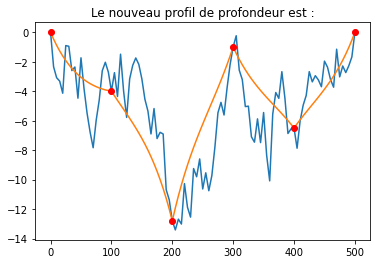

In [32]:
allval3_mu=np.zeros(N)
allval3_mu[unknown_indexes]=simu_mu
allval3_mu[observation_indexes]=depth
plt.plot(discretization,allval3_mu)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.title("Le nouveau profil de profondeur est :")
plt.show()

#### Question 9 :  Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

Et on en déduit la nouvelle valeur moyenne de câble 521.701 qui converge comme suit :


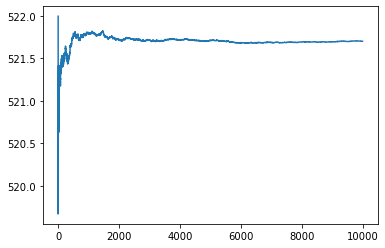

In [33]:
K=10000
result_mu = np.zeros(K)

for i in range(K):
    mu_cond = np.random.normal(mu_chap, sigma2_chap,)
    while mu_cond > 0 :
        mu_cond = np.random.normal(mu_chap, sigma2_chap)
    mu = mu_cond
    invSigma=np.linalg.inv(SigmaObs)
    Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec + np.matmul(Cholesky,x)
    while True in (simu_mu > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_mu=Ec+np.matmul(Cholesky,x)
    allval3_mu[unknown_indexes]=simu_mu
    result_mu[i]=length(allval3_mu,Delta)
    
print(f"Et on en déduit la nouvelle valeur moyenne de câble {sum(result_mu)/K :.3f} qui converge comme suit :")
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_mu)/indice_simu)
plt.show()

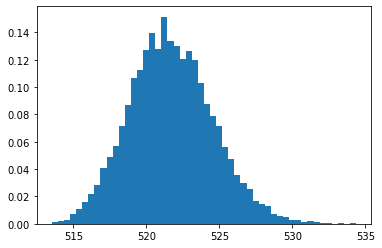

In [34]:
plt.hist(result_mu,50,density=True)
plt.show()

In [35]:
print(f"Le nouvel intervalle de confiance est {np.quantile(result_mu,[0.025,0.975])}")

Le nouvel intervalle de confiance est [516.39156848 527.58311447]


In [36]:
print(f"Et donc la probabilité de dépassement est {np.mean(result_mu > 525)}")

Et donc la probabilité de dépassement est 0.1237


Ainsi la longueur moyenne de câble a encore diminué et l'intervalle de confiance s'est recentré autour de la nouvelle valeur moyenne.

#### Question 10 :  Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

Si on rendait aléatoire les paramètres $\sigma^2$ et $a$, cela rendrait aléatoire la matrice de covariance. Ces deux paramètres déterminent la manière dont les profondeurs en certains points influent sur le calcul des profondeurs voisines: en particulier $a$ exprime une distance caractéristique au delà de laquelle la profondeur en un point n'est plus corrélée à celles en les autres points, alors que $\sigma^2$ représente directement la corrélation entre les profondeurs des points quelle que soit la distance qui les sépare. Si $\sigma^2$ et $a$ diminuent, alors les profondeurs seront moins corrélées les unes aux autres, et on risque d'avoir des profils de profondeur avec de grandes disparités, puisque les profondeurs mesurées n'ont plus autant d'influence sur les profondeurs simulées, ce qui se traduit par des longueurs de câbles plus grandes. A contrario, si ces paramètres augmentent, il est plus probable d'obtenir des profils très "lisses", donc des longueurs de câbles plus faibles. Ces observations nous conduisent à faire l'hypothèse que la valeur moyenne de longueur de câble, et sa convergence ne seraient pas, ou peu impactées, mais que l'histogramme serait plus large (puisque les cas extremes seraient plus courants), l'intervalle de confiance également plus large, ainsi que la probabilité de dépassement de 525m.